In [47]:
#import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

In [48]:
# Load the data and print it
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [49]:
# display some information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [50]:
# display some statistics about data
df1.describe().round(1)

,bath,balcony,price
count,13247.0,12711.0,13320.0
mean,2.7,1.6,112.6
std,1.3,0.8,149.0
min,1.0,0.0,8.0
25%,2.0,1.0,50.0
50%,2.0,2.0,72.0
75%,3.0,2.0,120.0
max,40.0,3.0,3600.0


In [18]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [21]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [22]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [23]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
df1['location'].value_counts()

location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [26]:
df1['balcony'].value_counts()

balcony
2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: count, dtype: int64

In [25]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64


# Data Cleaning


> Remove the duplicates in the rows(if any).

In [7]:
#display number of duplicated
print(df1.duplicated().sum())

529


In [16]:
df1.drop_duplicates(keep='first',inplace=True)

In [17]:
#display number of duplicated
print(df1.duplicated().sum())

0


In [27]:
df2 = df1.drop(['society','availability'],axis='columns')
df2.shape

(12791, 7)

<Axes: >

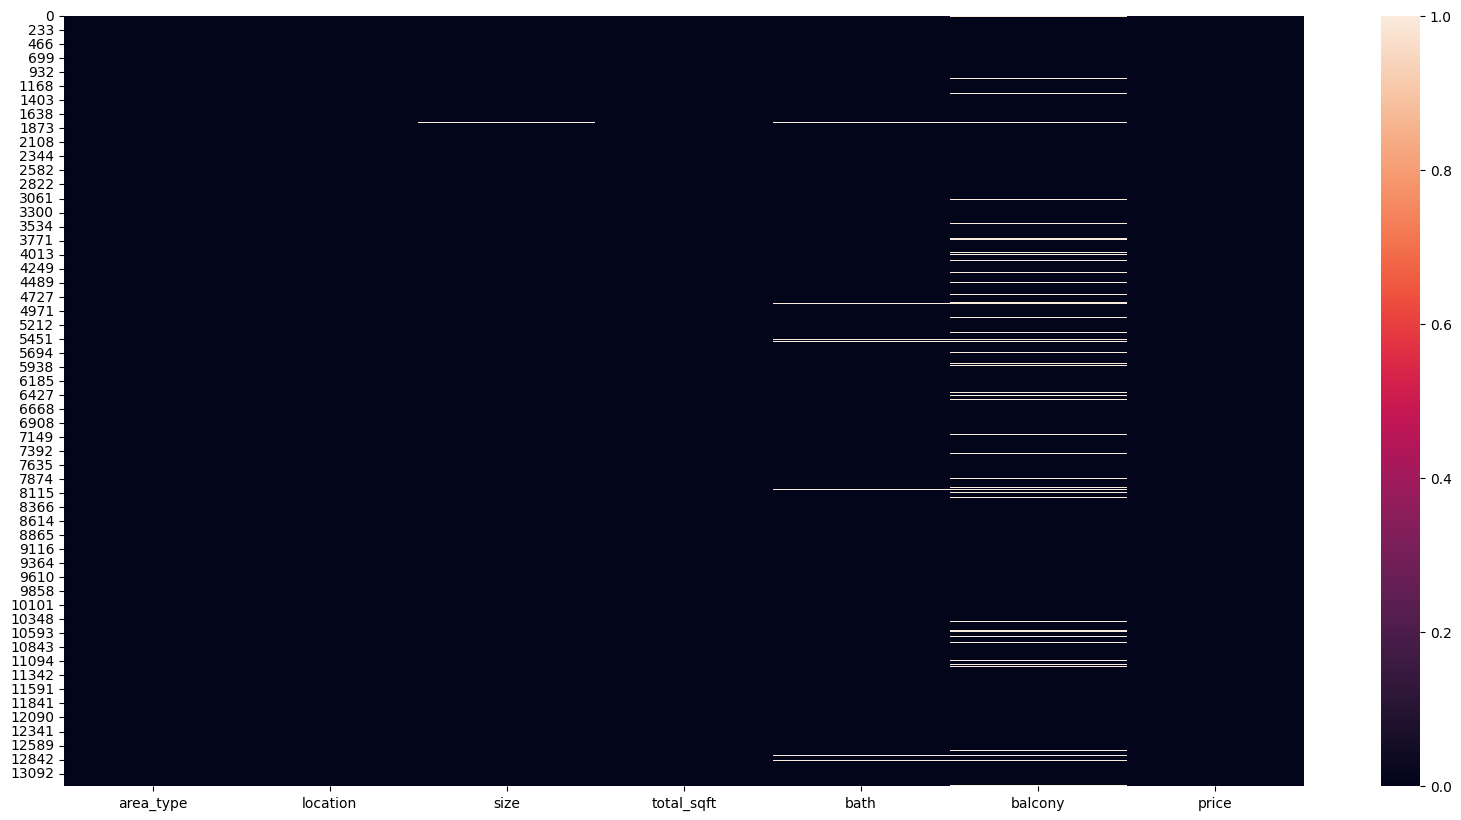

In [28]:
sns.heatmap(df2.isna())

In [37]:
null_per = round((df2['balcony'].isna().sum()/df2['balcony'].sum()) * 100 , 2)
print (f'null percentage is {null_per}%')

null percentage is 3.14%


In [38]:
df3 = df2.dropna()


<Axes: >

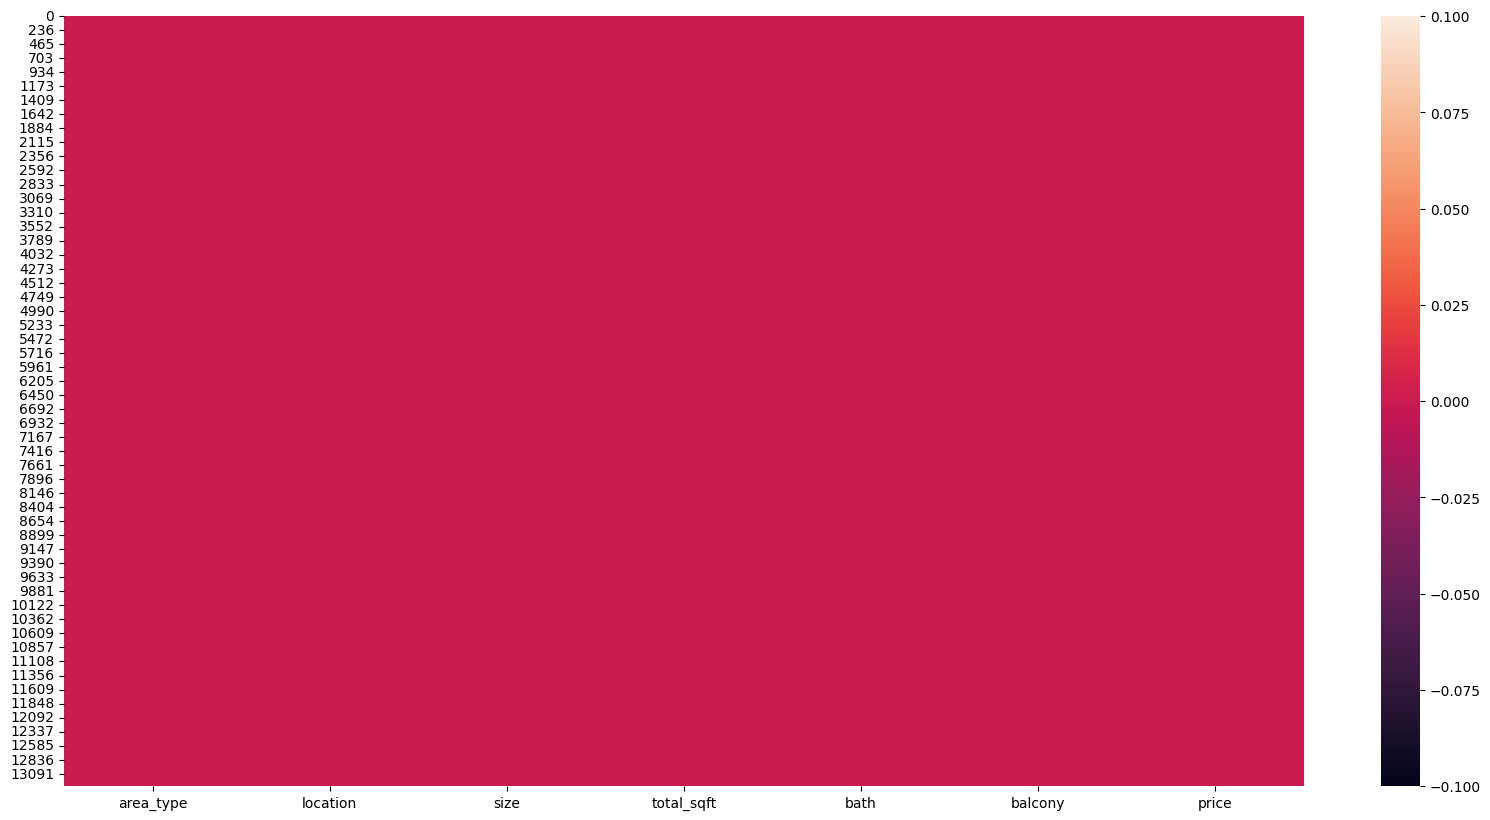

In [40]:
sns.heatmap(df3.isna())

In [41]:
df3.shape

(12185, 7)

In [42]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/tmp/ipykernel_34456/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [43]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [44]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


# Feature Engineering

In [46]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [51]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


In [52]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()


,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [53]:
df5.to_csv("bhp.csv",index=False)

In [54]:
df5.location = df5.location.apply(lambda x :x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield           497
Sarjapur  Road       352
Electronic City      287
Kanakpura Road       236
Thanisandra          228
                    ... 
N R Layout             1
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Abshot Layout          1
Name: count, Length: 1248, dtype: int64

In [55]:
len(location_stats[location_stats>10])

225

# Dimensionality Reduction

In [56]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [57]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

226

In [58]:
df5.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000



# Outlier Removal Using Business Logic


> normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [60]:
df5[df5.total_sqft/df5.bhk<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [61]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(11498, 9)

# Outlier Removal Using Standard Deviation and Mean

In [62]:
df6.price_per_sqft.describe()

count     11498.000000
mean       6263.708278
std        4048.606167
min         267.829813
25%        4226.921275
50%        5290.820191
75%        6875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

> Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [63]:
def remove_pps_outliers(df):
    # Create an empty DataFrame to store the filtered data
    df_out = pd.DataFrame()

    # Iterate through each location in the dataset
    for key, subdf in df.groupby('location'):
        # Calculate the mean and standard deviation of price_per_sqft for the current location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        # Filter out the outliers based on a range defined by mean and standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]

        # Concatenate the filtered data for the current location to the final DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    # Return the DataFrame without outliers
    return df_out

# Apply the remove_pps_outliers function to the DataFrame df6, store the result in df7
df7 = remove_pps_outliers(df6)

# Display the shape of the resulting DataFrame df7
df7.shape

(9437, 9)

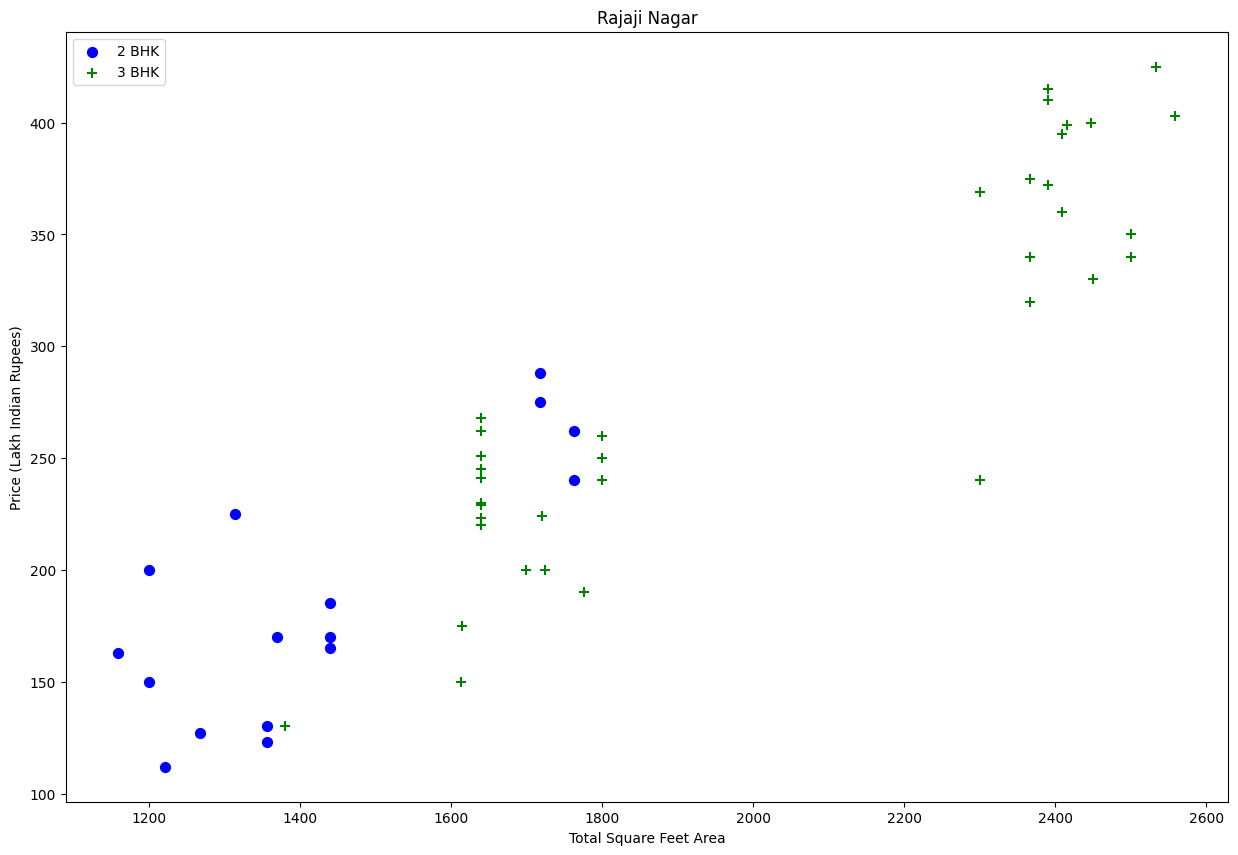

In [64]:
def plot_scatter_chart(df, location):
    # Filter data for 2 BHK and 3 BHK in the specified location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # Set the size of the scatter plot
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    # Plot scatter chart for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)

    # Plot scatter chart for 3 BHK
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)

    # Set X and Y axis labels
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")

    # Set the title of the plot as the specified location
    plt.title(location)

    # Display legend to differentiate between 2 BHK and 3 BHK
    plt.legend()

# Example usage: Plot scatter chart for "Rajaji Nagar" using the filtered DataFrame df7
plot_scatter_chart(df7, "Rajaji Nagar")


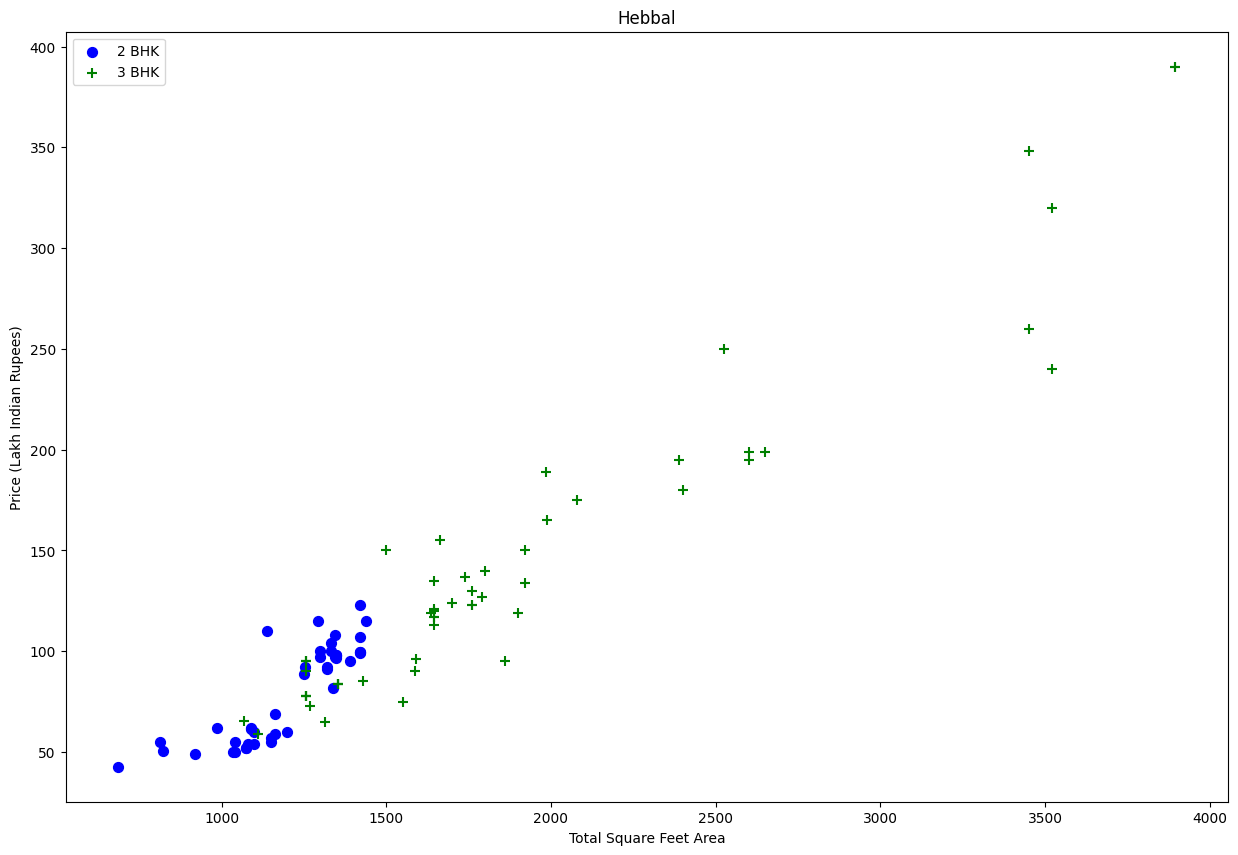

In [65]:
plot_scatter_chart(df7,"Hebbal")

> We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

In [66]:
def remove_bhk_outliers(df):
    # Create an empty array to store indices of outliers to be excluded
    exclude_indices = np.array([])

    # Iterate through each location in the DataFrame
    for location, location_df in df.groupby('location'):
        # Create a dictionary to store statistics for each BHK configuration in the current location
        bhk_stats = {}

        # Calculate mean, standard deviation, and count for each BHK configuration
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        # Iterate through each BHK configuration in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Check if statistics for (bhk-1) configuration exist and have a sufficient count
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                # Exclude indices of outliers based on the mean of (bhk-1) configuration
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    # Drop rows with outlier indices from the DataFrame
    return df.drop(exclude_indices, axis='index')

# Apply the remove_bhk_outliers function to the DataFrame df7, store the result in df8
df8 = remove_bhk_outliers(df7)

# Display the shape of the resulting DataFrame df8
df8.shape

(6675, 9)

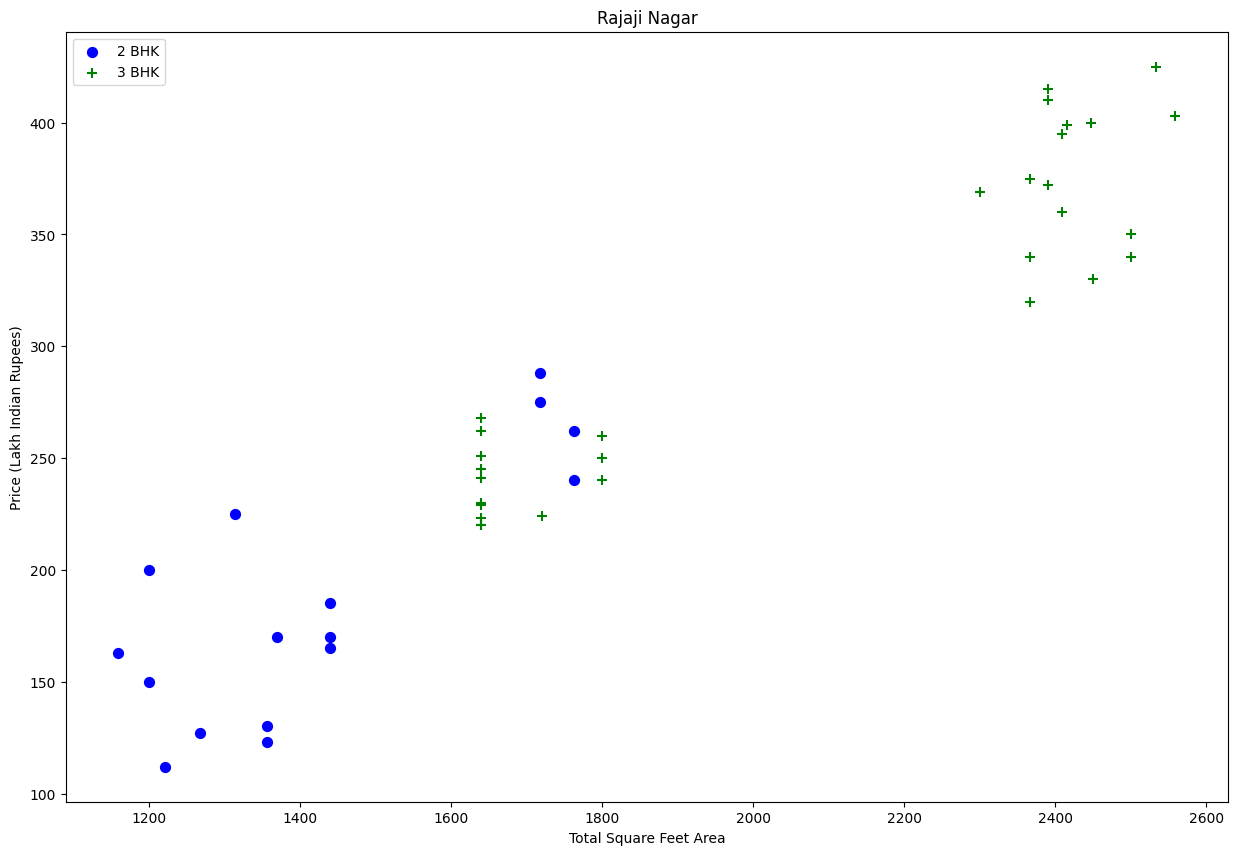

In [67]:
plot_scatter_chart(df8,"Rajaji Nagar")

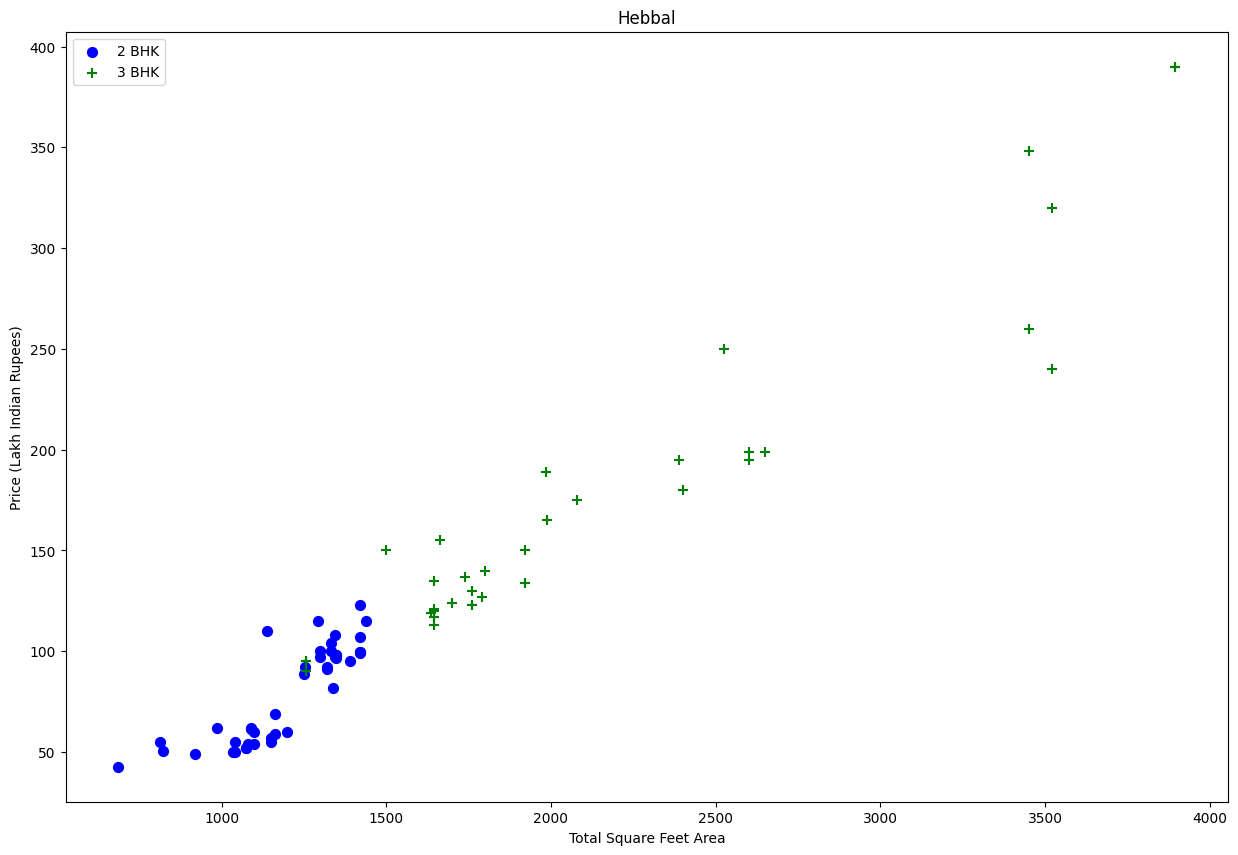

In [68]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

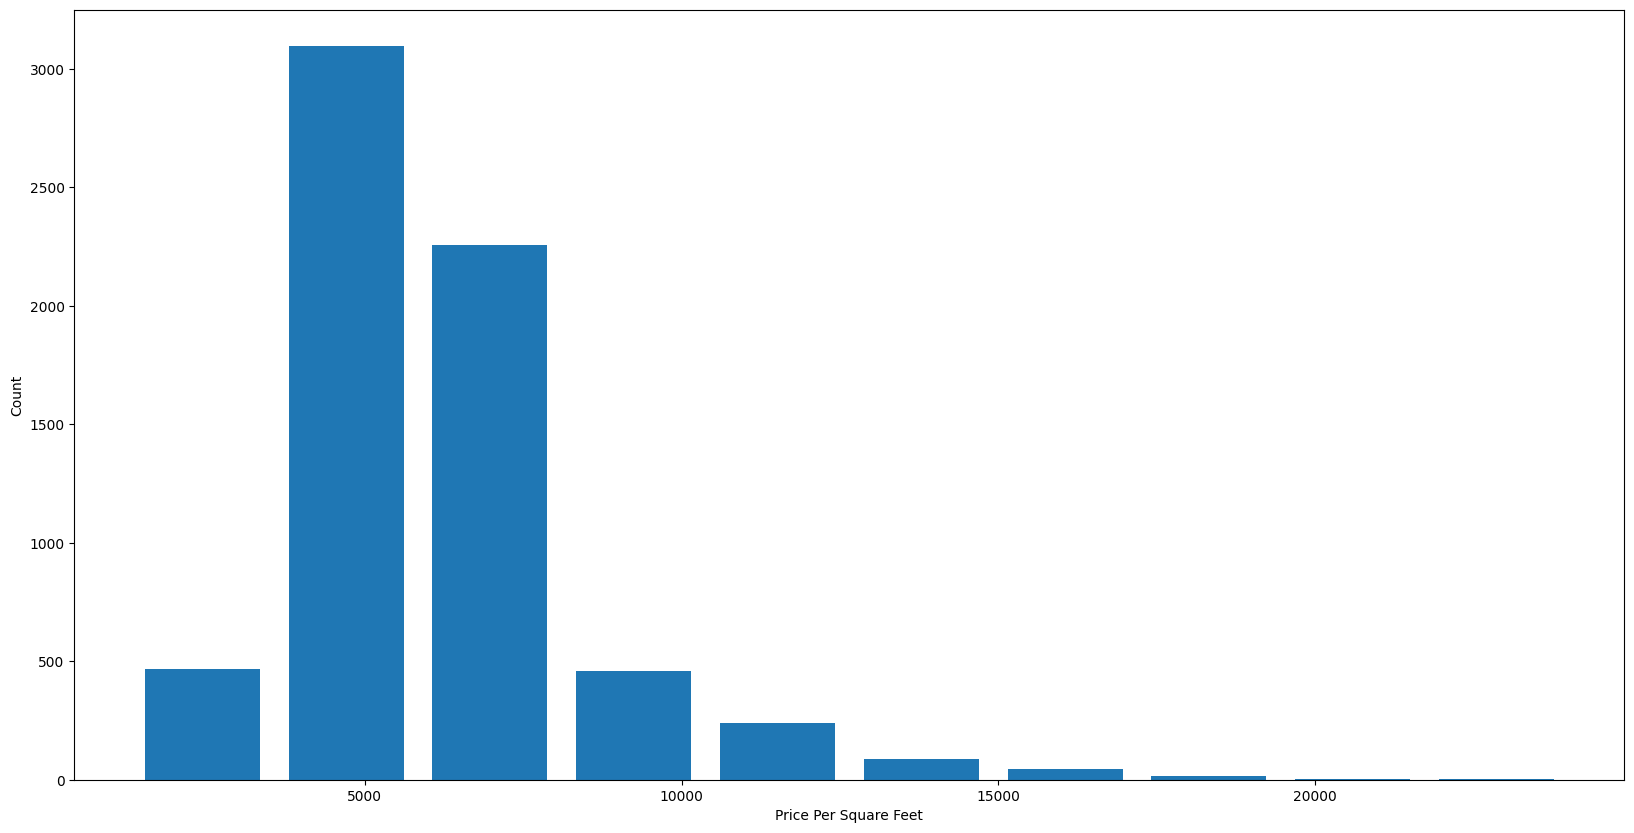

In [69]:
# Set the size of the figure to (20, 10) for a larger display
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Plot a histogram of the 'price_per_sqft' column from the DataFrame df8
plt.hist(df8.price_per_sqft, rwidth=0.8)

# Set X and Y axis labels
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'Count')

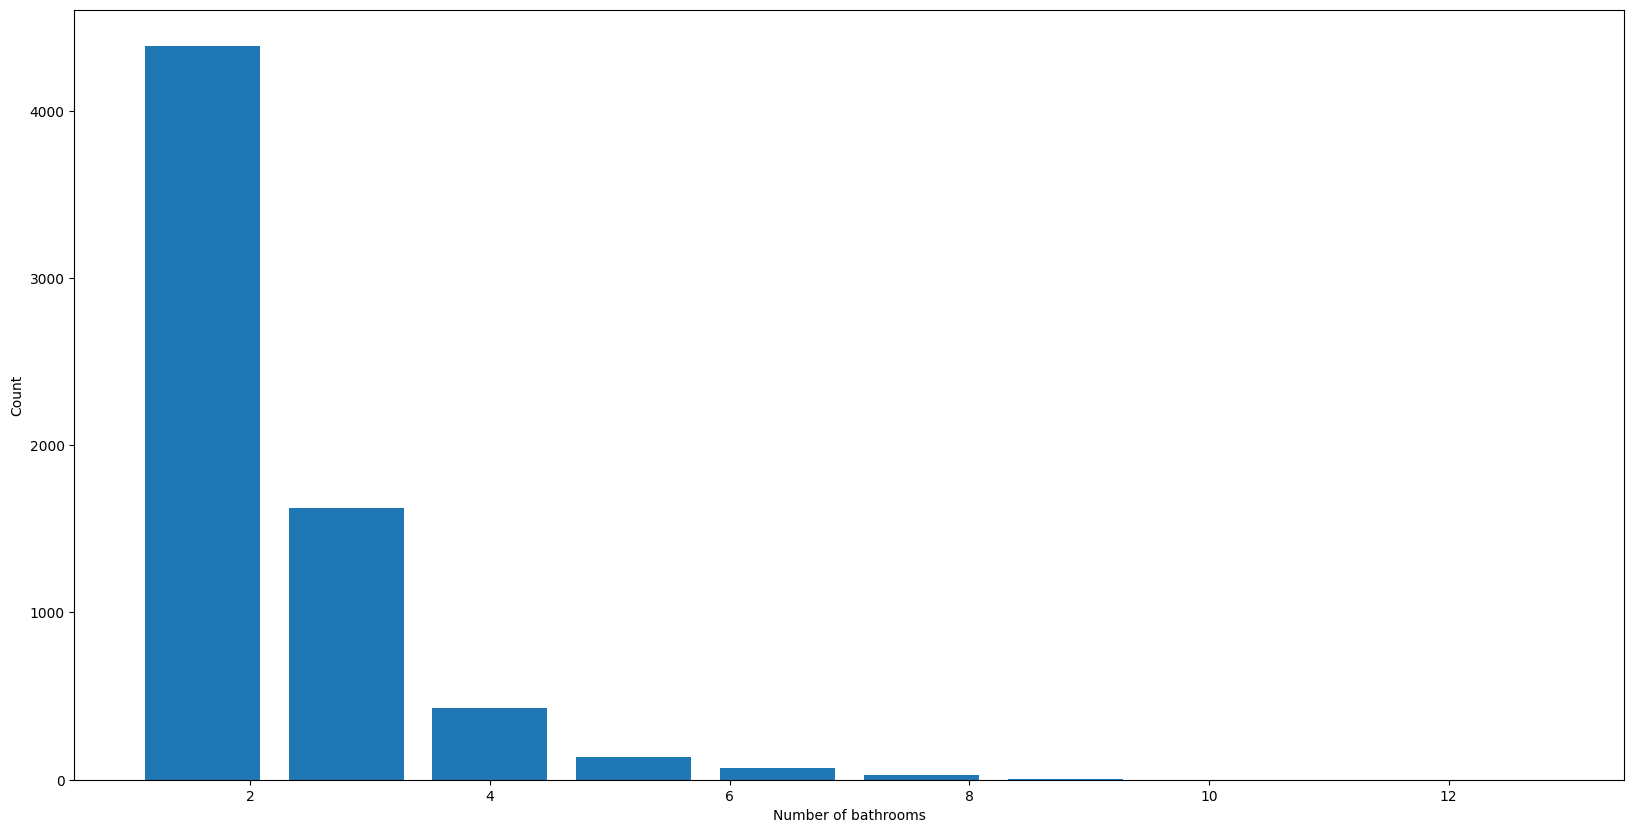

In [70]:
# Plot a histogram of the 'pBathrooms' 
plt.hist(df8.bath,rwidth=0.8)

# Set X and Y axis labels
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [72]:
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1433,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6047,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
7633,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


> It is unusual to have 2 more bathrooms than number of bedrooms in a home


In [73]:
# Create new data frame by ignore outliers at bathrooms
df9 = df8[df8.bath<df8.bhk+2]

# display the shape
df9.shape

(6607, 9)

In [74]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
